In [17]:
import os
import sys
sys.path.insert(0, "/home/qiyuan/sp/mitsuba3/build/python")

import mitsuba as mi
import drjit as dr

from typing import Union
import matplotlib.pyplot as plt
import numpy as np


print("Loaded Mitsuba from: ", os.path.dirname(mi.__file__))
print("Loaded Mitsuba from: ", os.path.dirname(dr.__file__))

mi.set_variant("cuda_ad_rgb")
# dr.set_log_level(dr.LogLevel.Trace)
# mi.set_log_level(mi.LogLevel.Trace)

scene_path = "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml"
scene = mi.load_file(scene_path)

Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/mitsuba
Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/drjit


2022-12-02 14:00:35 INFO main [xml.cpp:1405] Loading XML file "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml" with variant "cuda_ad_rgb"..

2022-12-02 14:00:35 DEBUG main [LinearCurve] Loading a linear curve file from "linear_sample_1.txt" ..

2022-12-02 14:00:35 DEBUG main [LinearCurve] Loaded a control point [-1.5, -1.5, 0] with radius 0.010000

2022-12-02 14:00:35 DEBUG main [LinearCurve] Loaded a control point [-1, 0.5, 3] with radius 0.400000

2022-12-02 14:00:35 DEBUG main [LinearCurve] Loaded a control point [1, 0.5, 3] with radius 0.400000

2022-12-02 14:00:35 DEBUG main [LinearCurve] Loaded a control point [1.5, -1.5, 0] with radius 0.400000

2022-12-02 14:00:35 DEBUG main [LinearCurve] Loaded a control point [0, 1, 0] with radius 0.010000

2022-12-02 14:00:35 DEBUG main [LinearCurve] "linear_sample_1.txt": read 5 control points (80 B in 7ms)

2022-12-02 14:00:35 INFO main [Scene] Building scene in OptiX ..

2022-12-02 14:00:35 DEBUG main [shapes.h:135] Build_single_gas for shape LinearCurve

2022-12-02 14:00:35 DEBUG main [LinearCurve] Optix_build_input done for one linear curve, numVertices 5, numPrimitives 4

2022-12-02 14:00:35 DEBUG main [shapes.h:164] OptiXAccelBufferSizes tempSizeInBytes:3480 outputSizeInBytes:3428 tempUpdateSizeInBytes:552

2022-12-02 14:00:35 DEBUG main [shapes.h:135] Build_single_gas for shape Sphere

2022-12-02 14:00:35 DEBUG main [shapes.h:164] OptiXAccelBufferSizes tempSizeInBytes:1408 outputSizeInBytes:1280 tempUpdateSizeInBytes:0

2022-12-02 14:00:35 DEBUG main [Scene] ias.size() == 2

2022-12-02 14:00:35 INFO main [Scene] OptiX ready. (took 9ms)

2022-12-02 14:00:35 INFO main [xml.cpp:1422] Done loading XML file "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml" (took 36ms).

2022-12-02 14:00:35 DEBUG main [Scene] Free OptiX IAS..

In [18]:
image = mi.render(scene, spp=16)

2022-12-02 14:00:35 INFO main [SamplingIntegrator] Starting render job (1024x768, 16 samples)

2022-12-02 14:00:35 INFO main [SamplingIntegrator] Computation graph recorded. (took 2ms)

7.989483


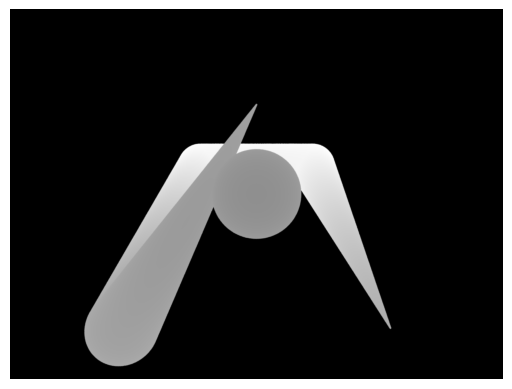

In [19]:
img_np = np.array(image)
print(img_np.max())
plt.axis("off")
plt.imshow(img_np / img_np.max()); # approximate sRGB tonemapping

In [20]:
# mi.util.write_bitmap("./bspline_sphere_mitsuba_optix_t_far.exr", image / 10.0)